# Rainfall Prediction - Weather Forecasting

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [27]:
WF_data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
WF_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [28]:
WF_data.shape

(8425, 23)

In [29]:
WF_data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [30]:
WF_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [31]:
WF_data.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [32]:
### Getting numerical features and categorical features
num_features=[col for col in WF_data.columns if WF_data[col].dtypes !='O']
cat_features=[col for col in WF_data.columns if col not in num_features]
print("categorical features:\n{}".format(cat_features),"\n")
print("numerical features:\n{}".format(num_features))

categorical features:
['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'] 

numerical features:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [33]:
print('number of categorical_features:',len(cat_features))
print('number of numerical_features:',len(num_features))

number of categorical_features: 7
number of numerical_features: 16


In [34]:
### Getting features contain nan values
nan_features=[col for col in WF_data.columns if WF_data[col].isnull().any()]
print("features contain nan_values:{}".format(nan_features))

features contain nan_values:['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']


In [35]:
### average values for nan values
WF_data[nan_features].isnull().mean()

MinTemp          0.008902
MaxTemp          0.007122
Rainfall         0.028487
Evaporation      0.416855
Sunshine         0.474065
WindGustDir      0.117626
WindGustSpeed    0.117626
WindDir9am       0.098398
WindDir3pm       0.036558
WindSpeed9am     0.009021
WindSpeed3pm     0.012700
Humidity9am      0.007003
Humidity3pm      0.012107
Pressure9am      0.155371
Pressure3pm      0.155727
Cloud9am         0.287359
Cloud3pm         0.291395
Temp9am          0.006647
Temp3pm          0.011395
RainToday        0.028487
RainTomorrow     0.028368
dtype: float64

In [36]:
WF_data.describe() # print summary of data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


<AxesSubplot:>

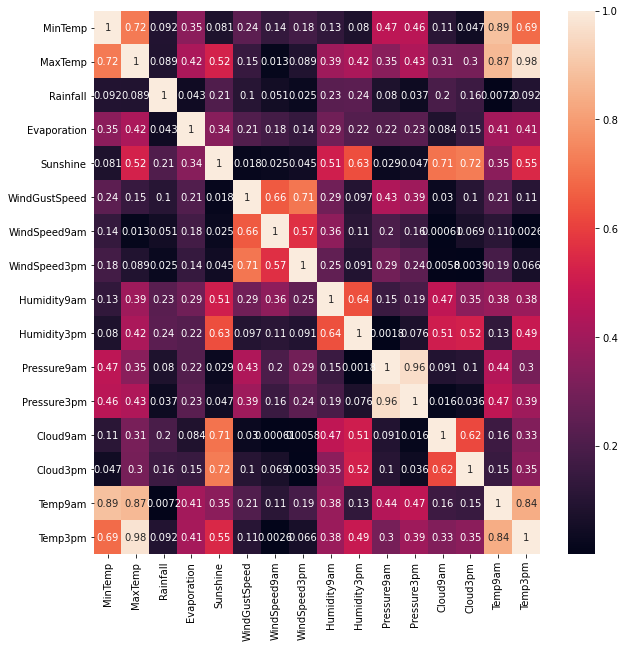

In [37]:
### check relationship with output variable
plt.figure(figsize=(10,10))
sns.heatmap(WF_data[num_features].corr().abs(),annot=True)

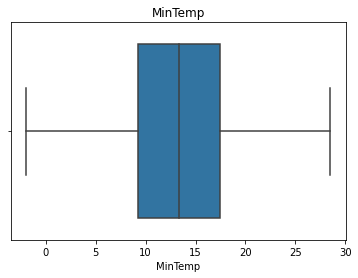

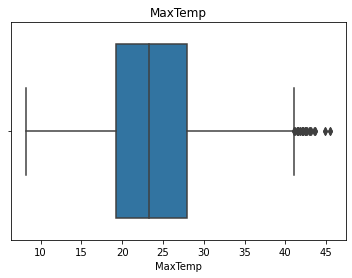

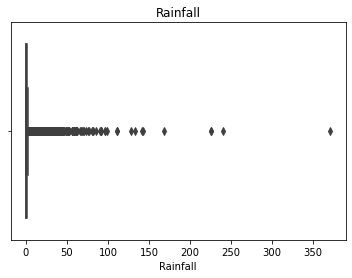

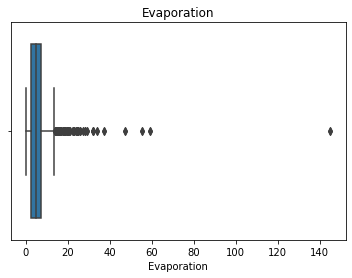

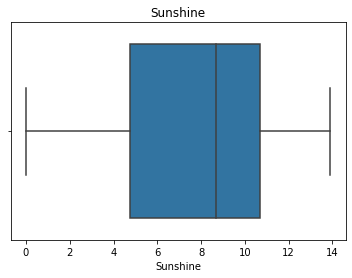

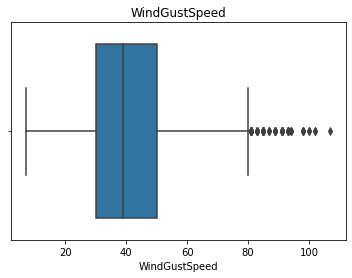

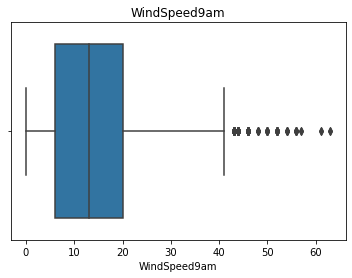

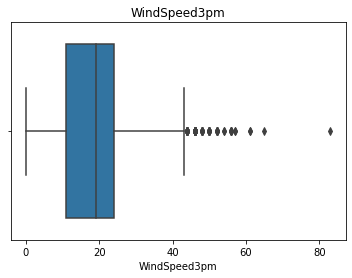

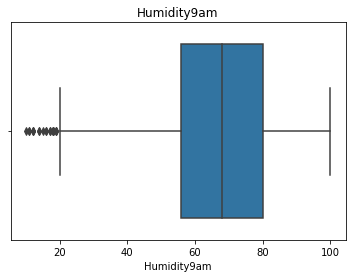

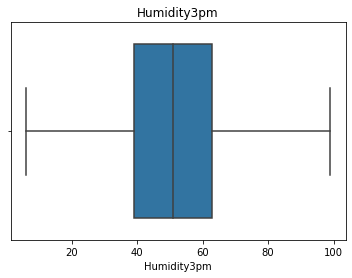

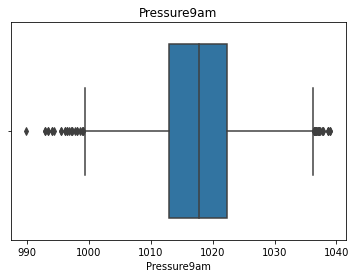

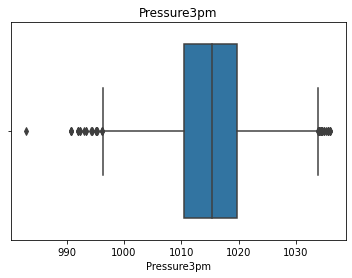

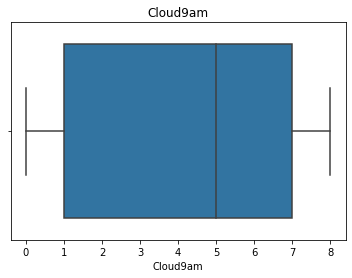

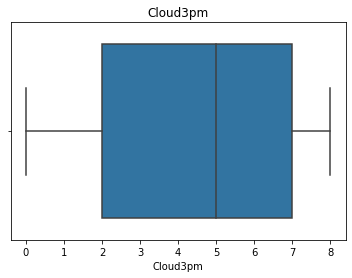

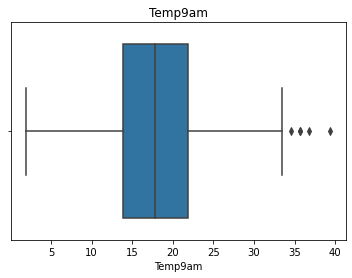

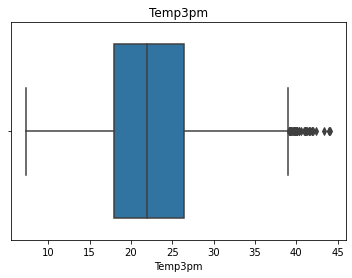

In [38]:
### Histogram for continous features
for col in num_features:
    sns.boxplot(WF_data[col])
    plt.title(col)
    plt.show()

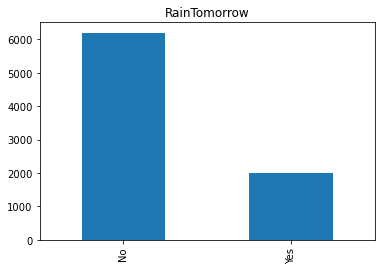

In [39]:
### value counts for target variable
WF_data['RainTomorrow'].value_counts().plot.bar()
plt.title('RainTomorrow')
plt.show()

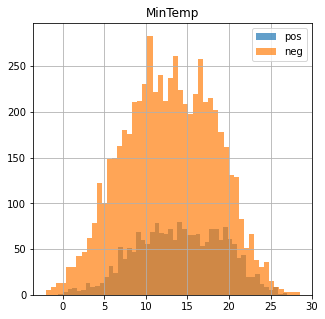

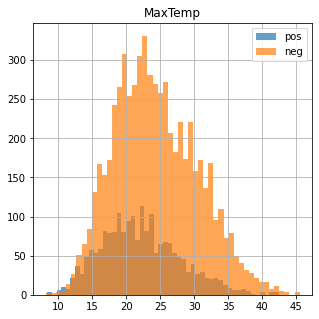

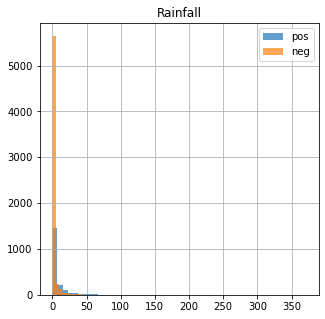

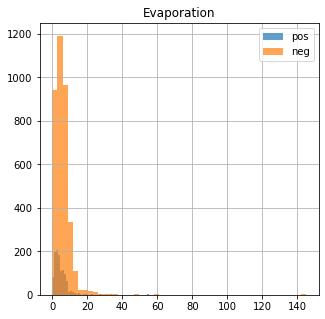

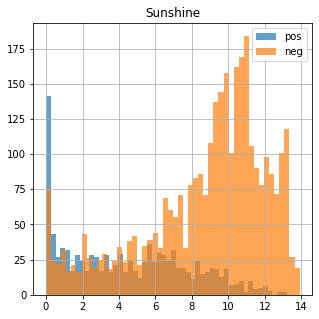

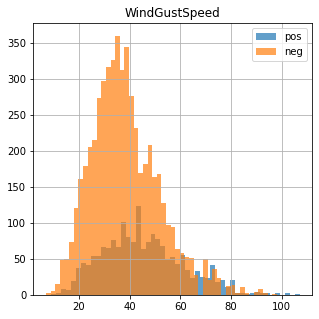

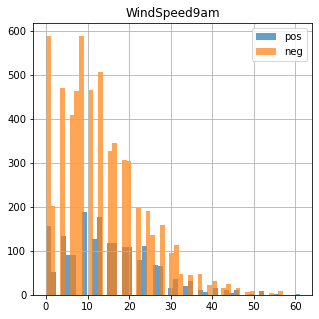

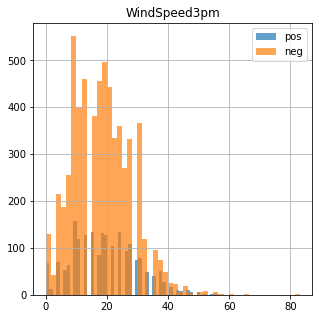

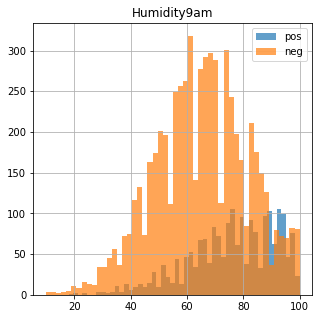

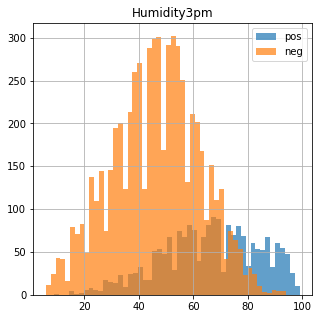

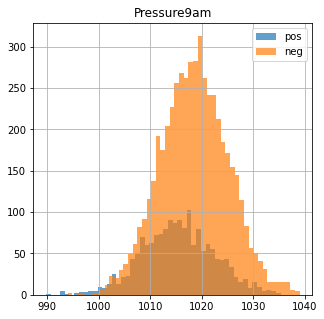

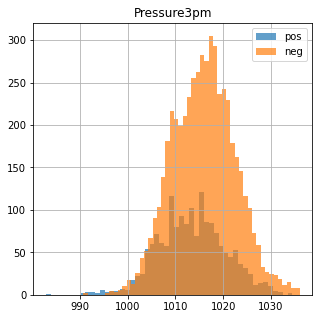

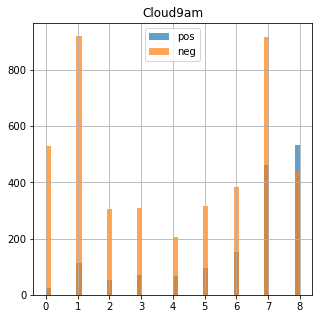

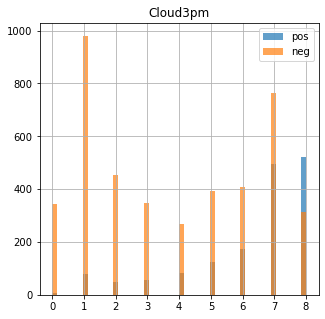

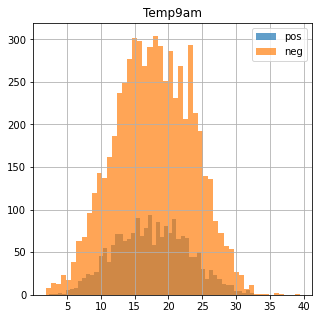

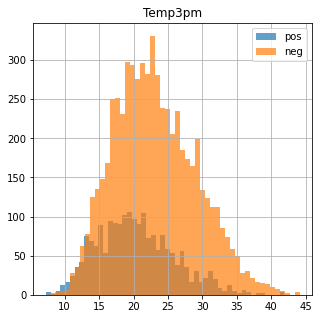

In [40]:
positive_class=WF_data[WF_data['RainTomorrow']=='Yes']
negative_class=WF_data[WF_data['RainTomorrow']=='No']
for col in num_features:
    plt.figure(figsize=(5,5))
    positive_class[col].hist(bins=50,alpha=0.7)
    negative_class[col].hist(bins=50,alpha=0.7)
    plt.title(col)
    plt.legend(['pos','neg'],loc='best')
    plt.show()

In [41]:
### now check multicolinearity 
def correlation (WF_data,threshold):
    col_corr=set() # names of correlated columns
    corr_matrix=WF_data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    
    return col_corr

print(correlation(WF_data[num_features],0.8))

{'Temp3pm', 'Pressure3pm', 'Temp9am'}


In [42]:
### we will drop highest correlation features
df=WF_data.drop(['Temp9am', 'Pressure3pm', 'Temp3pm'],axis=1)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,8.0,NaN,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,NaN,NaN,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,NaN,2.0,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,NaN,NaN,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,7.0,8.0,No,No


In [43]:
### categorical features
for col in cat_features:
    print(col+":",len(WF_data[col].unique()))

Date: 3004
Location: 12
WindGustDir: 17
WindDir9am: 17
WindDir3pm: 17
RainToday: 3
RainTomorrow: 3


In [44]:
### date variable
WF_data['Date']=pd.to_datetime(WF_data['Date'])
WF_data['year']=WF_data['Date'].dt.year
WF_data['month']=WF_data['Date'].dt.month
WF_data['Days']=WF_data['Date'].dt.day
WF_data=WF_data.drop('Date',axis=1)
WF_data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,Days
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [45]:
nan_features=[col for col in WF_data.columns if WF_data[col].isnull().any()]
print("features contain nan_values:{}".format(nan_features))

features contain nan_values:['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']


In [46]:
num_imputed=[col for col in nan_features if WF_data[col].dtypes !='O']
### imputation numerical features
def imputation_numerical (num_imputed):
    from sklearn.impute import SimpleImputer
    imputer=SimpleImputer(strategy='mean')
    WF_data[num_imputed]=imputer.fit_transform(WF_data[num_imputed])
    return WF_data[num_imputed]

WF_data[num_imputed]=imputation_numerical(num_imputed)
print(WF_data[num_imputed].isnull().sum()) ### check nan values

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64


In [47]:
### imputer categorical features
cat_imputed=[col for col in nan_features if col not in num_imputed]
def imputation_categorical(cat_imputed):
    for col in cat_imputed:
        WF_data[col]=WF_data[col].fillna(WF_data[col].mode().iloc[0])
    return WF_data[cat_imputed]

WF_data[cat_imputed]=imputation_categorical(cat_imputed)
print(WF_data[cat_imputed].isnull().sum())  ### check nan_values

WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64


In [50]:
### encoding categorical features
num_features=[col for col in WF_data.columns if WF_data[col].dtypes !='O']
cat_features=[col for col in WF_data.columns if col not in num_features]
for col in cat_features:
    label_list=list(WF_data[col].unique())
    label_dict={i:v for v,i in enumerate(label_list,0)}
    WF_data[col]=WF_data[col].map(label_dict)

In [52]:
WF_data.head(20)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,Days
0,0,13.4,22.9,0.600000,5.389395,7.632205,0,44.000000,0,0,...,1007.1,8.000000,4.503183,16.9,21.8,0,0,2008,12,1
1,0,7.4,25.1,0.000000,5.389395,7.632205,1,44.000000,1,1,...,1007.8,4.566622,4.503183,17.2,24.3,0,0,2008,12,2
2,0,12.9,25.7,0.000000,5.389395,7.632205,2,46.000000,0,1,...,1008.7,4.566622,2.000000,21.0,23.2,0,0,2008,12,3
3,0,9.2,28.0,0.000000,5.389395,7.632205,3,24.000000,2,2,...,1012.8,4.566622,4.503183,18.1,26.5,0,0,2008,12,4
4,0,17.5,32.3,1.000000,5.389395,7.632205,0,41.000000,3,3,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,2008,12,5
5,0,14.6,29.7,0.200000,5.389395,7.632205,1,56.000000,0,4,...,1005.4,4.566622,4.503183,20.6,28.9,0,0,2008,12,6
6,0,14.3,25.0,0.000000,5.389395,7.632205,0,50.000000,4,4,...,1008.2,1.000000,4.503183,18.1,24.6,0,0,2008,12,7
7,0,7.7,26.7,0.000000,5.389395,7.632205,0,35.000000,5,4,...,1010.1,4.566622,4.503183,16.3,25.5,0,0,2008,12,8
8,0,9.7,31.9,0.000000,5.389395,7.632205,4,80.000000,2,3,...,1003.6,4.566622,4.503183,18.3,30.2,0,1,2008,12,9
9,0,13.1,30.1,1.400000,5.389395,7.632205,0,28.000000,6,5,...,1005.7,4.566622,4.503183,20.1,28.2,1,0,2008,12,10


In [53]:
X=WF_data.drop('RainTomorrow',axis=1)
y=WF_data['RainTomorrow']

In [54]:
### spliting data set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier()
model.fit(X_train,y_train)

GradientBoostingClassifier()

In [56]:
y_pred=model.predict(X_test)

In [57]:
### Error metrics
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
print('accuracy_score:%0.2f'%score)

accuracy_score:0.85


In [58]:
### confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[1216   70]
 [ 178  221]]


In [59]:
### classification report
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1286
           1       0.76      0.55      0.64       399

    accuracy                           0.85      1685
   macro avg       0.82      0.75      0.77      1685
weighted avg       0.85      0.85      0.84      1685



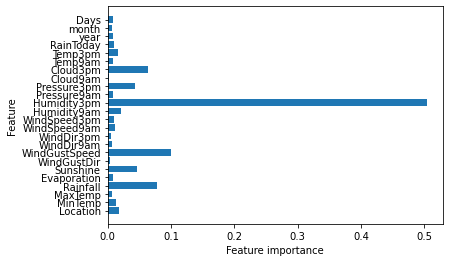

In [60]:
def plot_feature_importances_cancer(model):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances_cancer(model)

# Saving the model

In [61]:
import joblib
joblib.dump(model,'Weather_forecasting.obj')

['Weather_forecasting.obj']